# 1. Predict Real Estate Prices with Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
- 보스턴의 집 값을 예측하는 데이터

In [2]:
from sklearn.datasets import load_boston

housing = load_boston()
data, target = housing["data"], housing["target"]

data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 1.2 EDA

In [4]:
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
pd.Series(target).describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

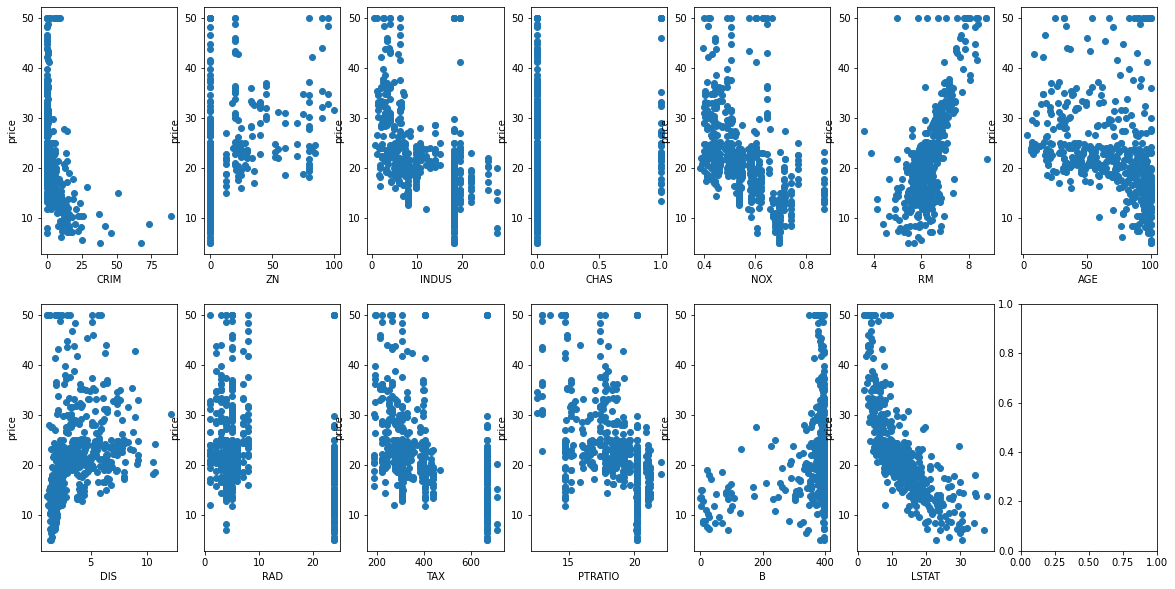

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 7, i % 7]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")

### 1.3 Data Split

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021)

# 2. Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

### 2.1 Learning

In [9]:
rf_regressor.fit(train_data, train_target)

RandomForestRegressor()

### 2.2 Predcit

Text(0, 0.5, 'real')

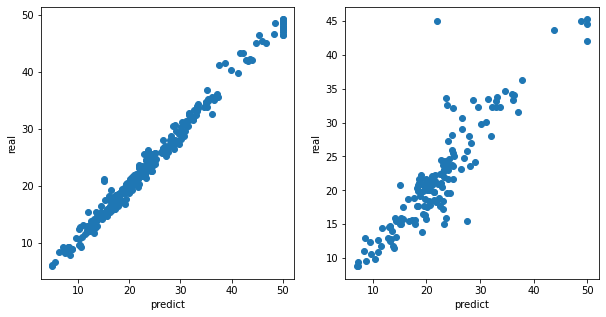

In [10]:
train_pred = rf_regressor.predict(train_data)
test_pred = rf_regressor.predict(test_data)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_target, train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(test_target, test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

### 2.3 Evalution

In [11]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_target, train_pred)
test_mse = mean_squared_error(test_target, test_pred)

print(f"train mean squared error is {train_mse:.4f}")
print(f"test mean squared error is {test_mse:.4f}")

train mean squared error is 1.3307
test mean squared error is 12.3085


### 2.4 Feature Importance

<AxesSubplot:>

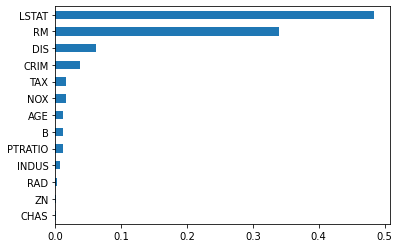

In [12]:
feature_importance = pd.Series(rf_regressor.feature_importances_, index=housing["feature_names"])
feature_importance.sort_values(ascending=True).plot(kind="barh")

# 3. Best Parameter
Random Forest Regressor에서 설정하는 argument
- n_estimators
    - 몇 개의 의사결정나무를 생성할지 결정
- criterion
    - 감소 시킬 평가지표를 설정
    - "mae": Mean Absolute Error
    - "mse": Mean Squared Error
- max_depth
    - 의사결정나무가 가질 수 있는 최대 깊이를 결정

### 3.1 Search Range Selection

In [13]:
params = {
    "n_estimators": [100, 200, 500, 1000],
    "criterion": ["mae", "mse"],
    "max_depth": [i for i in range(1, 10, 2)],
}

params

{'n_estimators': [100, 200, 500, 1000],
 'criterion': ['mae', 'mse'],
 'max_depth': [1, 3, 5, 7, 9]}

In [14]:
cv_rf_regressor = RandomForestRegressor()

### 3.2 Exploration

In [15]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=cv_rf_regressor, param_grid=params, cv=3)
grid = grid.fit(train_data, train_target)

In [16]:
print(f"Best score of paramter search is: {grid.best_score_:.4f}")
print(f"Best parameter of best score is : {grid.best_params_:}")

Best score of paramter search is: 0.8688
Best parameter of best score is : {'criterion': 'mse', 'max_depth': 9, 'n_estimators': 1000}


### 3.3 Evalution

Text(0, 0.5, 'real')

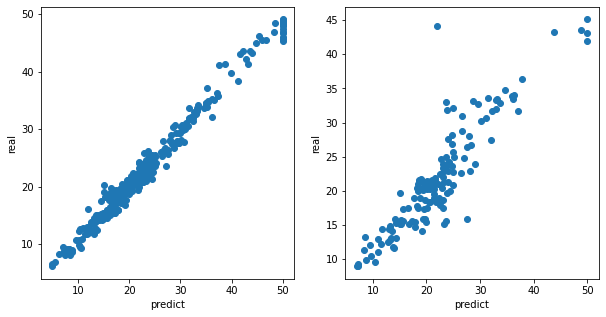

In [17]:
best_rf = grid.best_estimator_

cv_train_pred = best_rf.predict(train_data)
cv_test_pred = best_rf.predict(test_data)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_target, cv_train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(test_target, cv_test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

In [18]:
cv_train_mse = mean_squared_error(train_target, cv_train_pred)
cv_test_mse = mean_squared_error(test_target, cv_test_pred)

print(f"Best model Train mean squared error is {cv_train_mse:.4f}")
print(f"Best model Test mean squared error is {cv_test_mse:.4f}")

Best model Train mean squared error is 1.8336
Best model Test mean squared error is 12.1187


<AxesSubplot:>

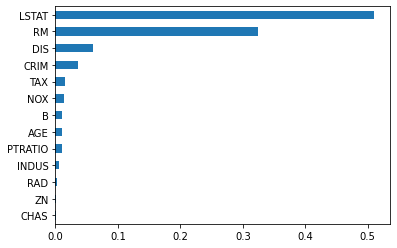

In [19]:
cv_feature_importance = pd.Series(best_rf.feature_importances_, index=housing["feature_names"])
cv_feature_importance.sort_values(ascending=True).plot(kind="barh")

# 4. Summary

In [20]:
print(f"Test mean squared error is {test_mse:.4f}")
print(f"Best model Test mean squared error is {cv_test_mse:.4f}")

Test mean squared error is 12.3085
Best model Test mean squared error is 12.1187


<AxesSubplot:>

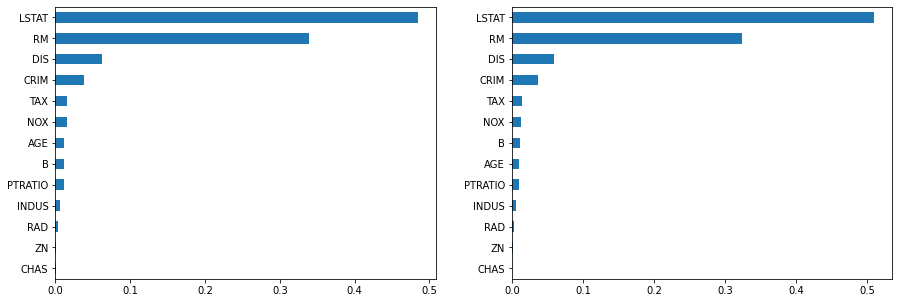

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
feature_importance.sort_values(ascending=True).plot(kind="barh", ax=axes[0])
cv_feature_importance.sort_values(ascending=True).plot(kind="barh", ax=axes[1])